In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from matplotlib.cbook import boxplot_stats  
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score ,classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import preprocessing
import numpy as np
from IPython.display import Image
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz
import pandas as pd
import dtreeviz
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from dtreeviz.models.shadow_decision_tree import ShadowDecTree
from dtreeviz.models.sklearn_decision_trees import ShadowSKDTree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
warnings.filterwarnings('ignore')
from dtreeviz import trees
from dtreeviz import clfviz
from sklearn.preprocessing import MinMaxScaler
from scikitplot.metrics import plot_lift_curve
from scikitplot.metrics import plot_cumulative_gain
from sklearn import metrics


sns.set_palette('pastel')

# **CRISP-DM**
## **<font color=blue> 1. [Business Understanding](#biz)</font>**
## **<font color=blue> 2. [Data Understanding](#Data_analysis)</font>** 
## **<font color=blue> 3. Data Preparation</font>** 



---

<br>
<a id="biz"></a>


# **<font color=white> 1. Business Understanding</font>**



<a id="kpi"></a>

## 1.1 Determine Business Objectives

<a id="background"></a>

#### 1.1.1 Background
Because of recent financial problems and increased competition, European banks are under pressure to increase financial assets. This case study considers the **telemarketing efforts for a targeted campaign by a Portuguese bank to increase deposit subscriptions**. The promotions offered long-terms with good interest rates **mainly through telephone calls** between May 2008 and November 2010 with a total of 41,188 customer contacts. Many customers were contacted more than once. **The average success rate was about 8%.** **The goal is to predict which customers are more likely to subscribe** to increase the effectiveness of future campaigns. 
<br>

<a id="objectives"></a>

#### 1.1.2 Business Objectives
> #### Questions:
>##### 1. Explain the **marketing problem that the bank faces in attracting new customers**.  Name and discuss at least two alternative approaches it use to attract new customers?  Is a data-based approach a good one?
>##### 2. Using the data provided estimate a **model that predicts whether a customer will subscribe** to a new deposit subscription.  Make sure to support your choice of model.  *What do you learn from the model about a good campaign?*  How would you convince a non-technical manager that this is a good model?
>##### 3. ***Design a new cross-selling campaign using your model***, be as specific as possible. What type of profit gain do you think you could hope to achieve?

<br>

<br>
<a id="Data_analysis"></a>

# **<font color=white> 2. Data Understanding</font>** 
>## 2.1 [Data Loading & Description](#load)
>## 2.2 [Data Exploration](#explore)
>> ### 2.2.1   [Target Variable Analysis](#target)
>> ### 2.2.2   [Numerical Features](#num_features)
>> ### 2.2.3   [Categorical Features](#cat_features)
>> ### 2.2.4   [Target & Feature Analysis](#target_features)
>## 2.3 [Data Quality](#Quality)



***

In [21]:
def describe_data(data):
    print('Data Dimensions: ')
    print("\tShape of the dataset is : " ,data.shape)
    print( '\tNumber of Rows: {}'.format( data.shape[0] ) )
    print( '\tNumber of Cols: {}'.format( data.shape[1] ) )
    print(' ')
    print('Data Types:' , data.info())
    print(' ')


<a id="load"></a>

## 2.1 Data Collection & Description


In [22]:
data = pd.read_csv('bank-full.csv', delimiter = ';')
describe_data(data)

Data Dimensions: 
	Shape of the dataset is :  (45211, 17)
	Number of Rows: 45211
	Number of Cols: 17
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+

<a id="explore"></a>

## 2.2 Data Exploration & Visualization


### Target Variable

In [23]:
def summary_target(data, target):
    summary = target.describe()
    true_count = target.value_counts()
    true_rate = true_count[1] / true_count[0]
    print('Summary Info:')
    print(summary)
    print('')
    print("Percent Positive: " +  str(true_rate *100))
    
    sns.countplot(target)
    plt.show();
    
#histogram of distribution 
def num_hist(data):
    data.select_dtypes(include=np.number).hist()
    plt.show();
    
# density plot of distribution
def num_dist(data):
    num_vars = []
    skews = []
    kurts = []
    dist_df = pd.DataFrame()
    for n in data.select_dtypes(include=np.number):
        sns.distplot(data[n])
        skew = data[n].skew()
        kurt = data[n].kurt()
        num_vars.append(n)
        skews.append(skew)
        kurts.append(kurt)
        plt.show();
        
    dist_df['Variable'] = num_vars
    dist_df['Skewness'] = skews
    dist_df['Kurtosis'] = kurts
    
    return dist_df, num_vars

def num_anomal(dist_df):
    
    # Skewness above 3 is significant
    skewed = dist_df[dist_df['Skewness'] > 3]
    skew_vars = list(skewed['Variable'])

    # Excess Kurtosis above 5 is significant
    kurted = dist_df[abs((dist_df['Kurtosis'] > 5))] 
    kurted_vars = list(kurted['Variable'])
    
    return skew_vars, kurted_vars

#correlation matrix
def num_cmap(data):
    f, ax = plt.subplots(figsize=(9,6))
    sns.heatmap(data.select_dtypes(include=np.number).corr(), 
            vmin=-1, vmax=1, center=0, cmap='Blues', annot=True)
    plt.show();
    
    cm = data.corr()
    corrs = cm.stack().reset_index()
    corrs.columns = ['V1', 'V2', 'Corr']
    corrs['Abs Corr'] = abs(corrs['Corr'])
    corrs = corrs[corrs['Corr'] != 1]
    corrs = corrs.sort_values(by = 'Abs Corr', ascending=False)
    return corrs

def remove_correlated(data, correlations):
    v1 = list(set(correlations[correlations['Abs Corr'] > 0.7]['V1']))
    v2 = list(set(correlations[correlations['Abs Corr'] > 0.7]['V2']))
    correlated_vars = list(set(v1 + v2))

    data = data.drop(correlated_vars, axis=1)
    
    return data
    
def num_one_boxplt(data):
    """ Graphs all numerical variables on one axes"""
    num_cols = data.select_dtypes(include=['int','int64','float'])
    melted_df = pd.melt(num_cols)
    sns.set(rc={'figure.figsize':(6,4)})
    sns.boxplot(x='value',y='variable',data=melted_df)
    plt.show();

def num_multi_boxplt(data):
    """ Graphs all numerical variables on their own axis"""
    for i in data.columns:
        sns.set(rc={'figure.figsize':(6,4)})
        temp_df = data.loc[:,i]
        sns.boxplot(temp_df)
        plt.show();
        
def one_cat_counts(data):
    for category in data.select_dtypes(include='O'):
        sns.countplot(x=category, data=data)
        plt.show();
        
def bi_cat_counts(data, target):
    for category in data.select_dtypes(include='O'):
        sns.countplot(y=category, data=data, hue = target, orient = 'v')
        plt.show();
sns.set_palette('pastel')

# density plot of distribution
def num_dist_targ(data, target):
    """ Plots all the numerical variables with the target variable overlaid. Because there are
    many more nos then yes's we normalized the graph to have a clearer picture of the graph
    """
    for n in data.select_dtypes(include=np.number):
        sns.displot(data, x = data[n], hue= target, element = 'step', stat='density', common_norm = False)
        plt.show();

def find_missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    plt.hist(percent, bins = 100)
    plt.xlabel('percentage NAs')
    plt.ylabel('frequency')
    plt.show();
    return missing_data
  

Summary Info:
count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

Percent Positive: 13.248334251790991


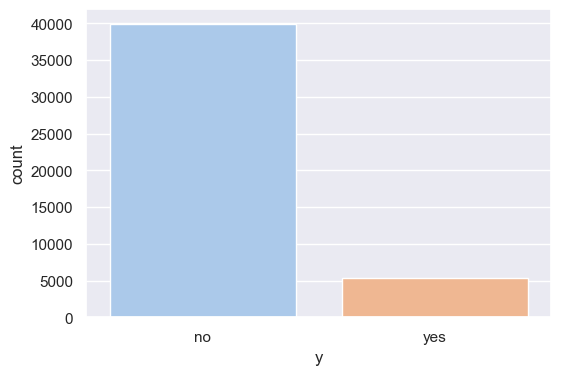

In [24]:
# imbalanced data set
summary_target(data, data['y'])

### Numerical Features

In [25]:
# Numerical Features
data.describe(include =[np.number]) # statistics for numerical columns only

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


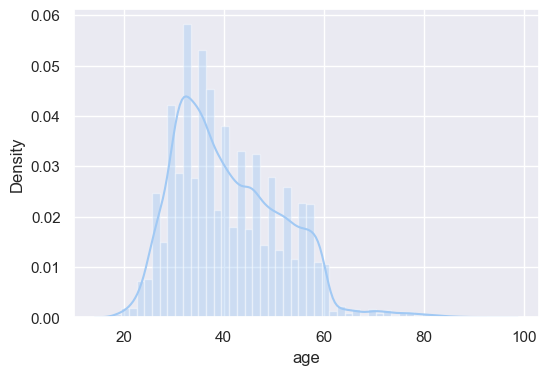

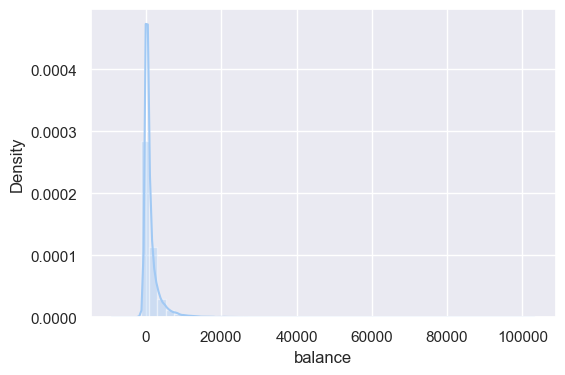

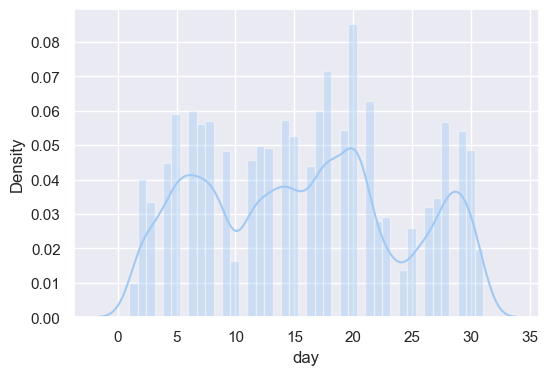

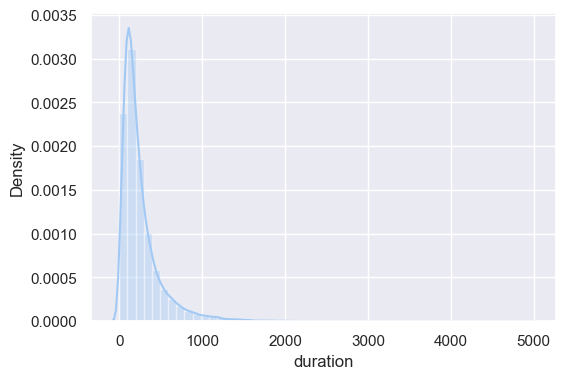

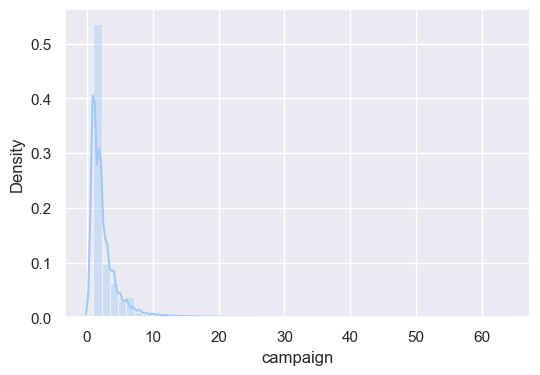

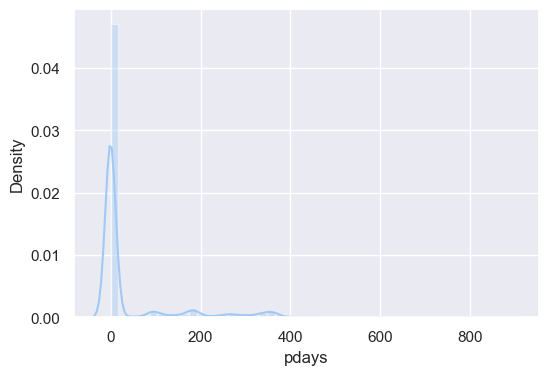

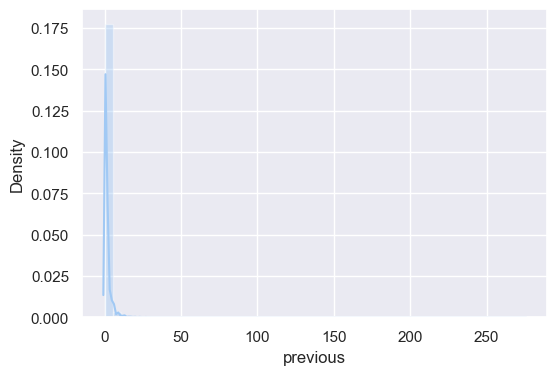

,Variable,Skewness,Kurtosis
0,age,0.684818,0.319570
1,balance,8.360308,140.751547
2,day,0.093079,-1.059897
3,duration,3.144318,18.153915
4,campaign,4.898650,39.249651
5,pdays,2.615715,6.935195
6,previous,41.846454,4506.860660


In [26]:
#num_hist(data)
dist_df, num_vars_list = num_dist(data)
skew_variables, kurted_variables = num_anomal(dist_df)
dist_df

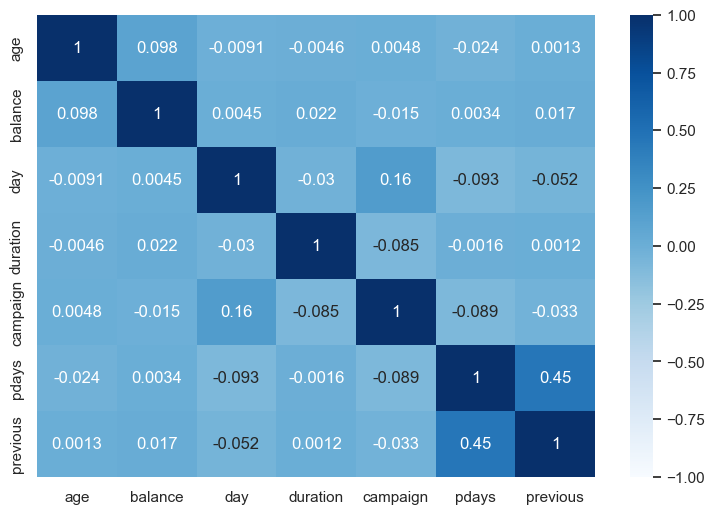

In [27]:
correlations = num_cmap(data)

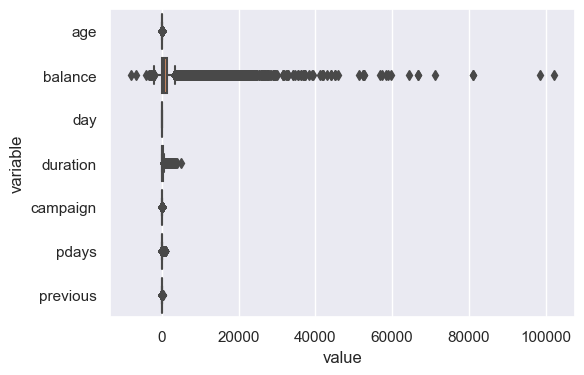

In [28]:
num_one_boxplt(data)

### Categorical Features

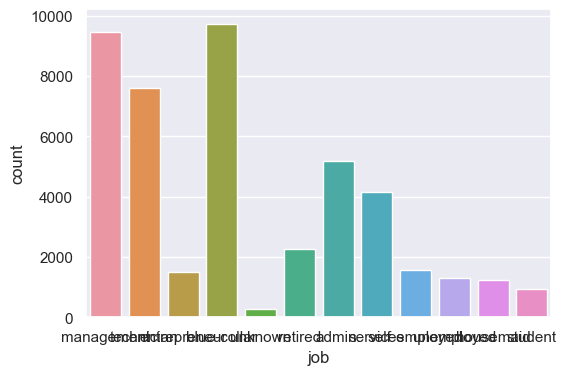

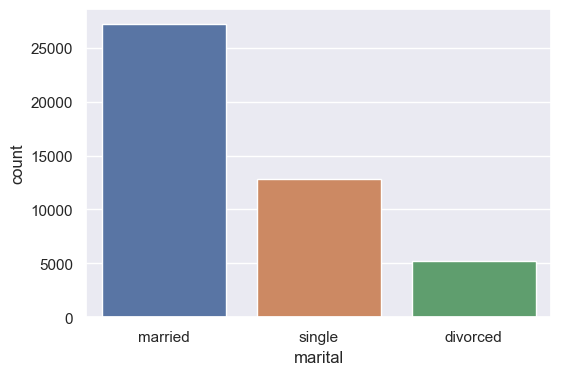

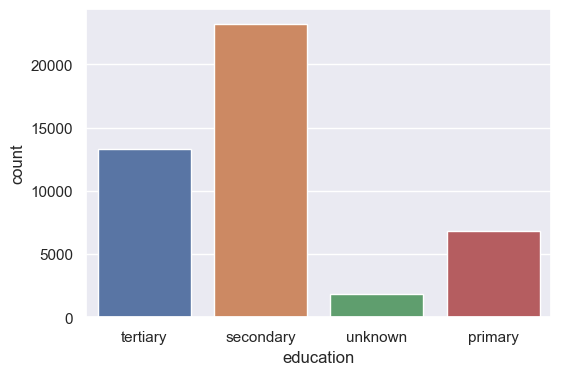

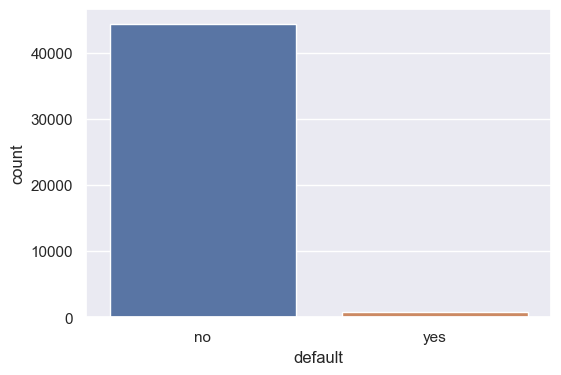

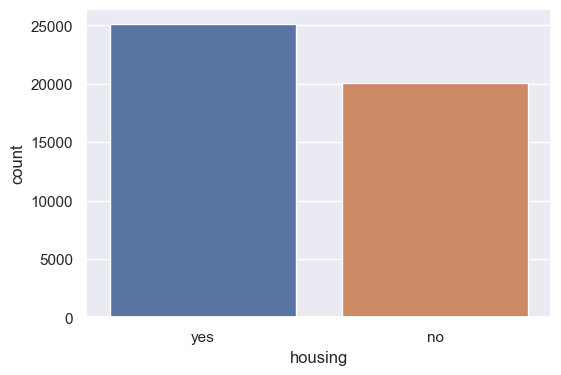

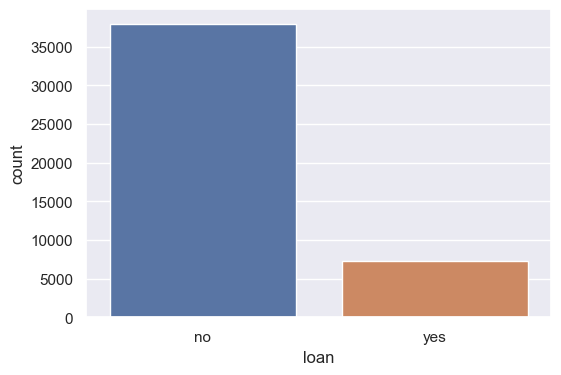

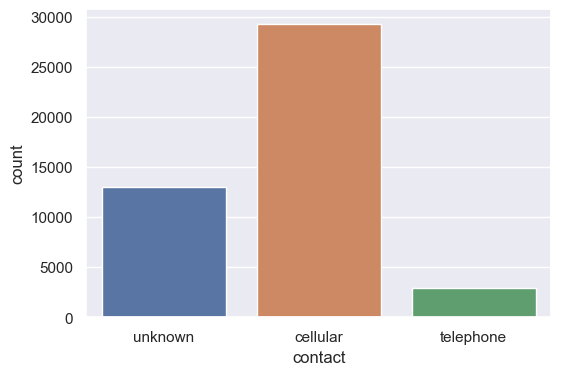

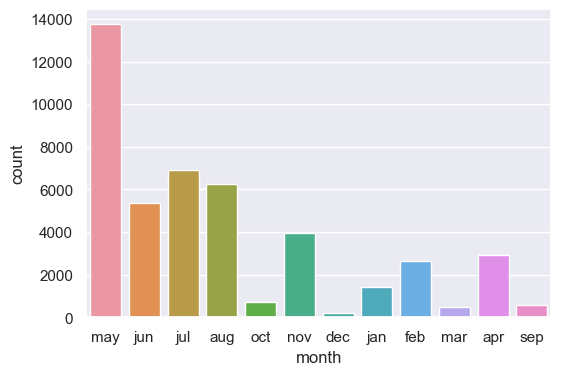

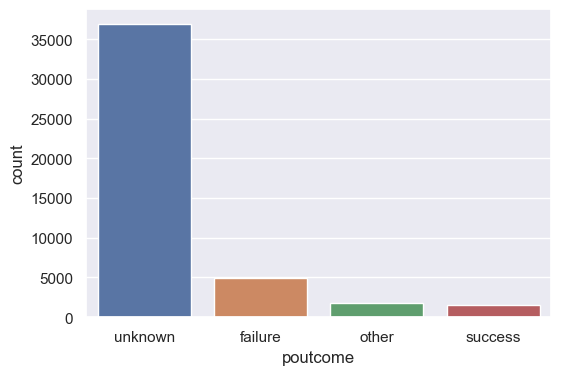

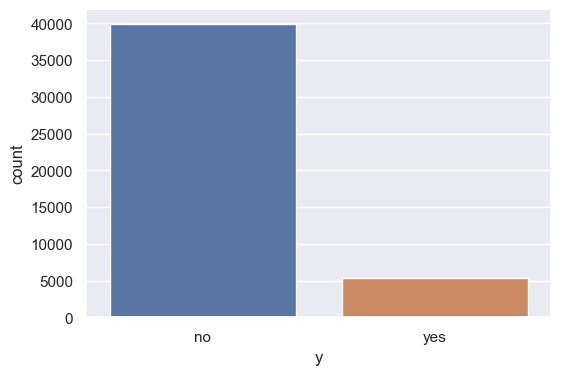

In [29]:
one_cat_counts(data)

### Target v Features 

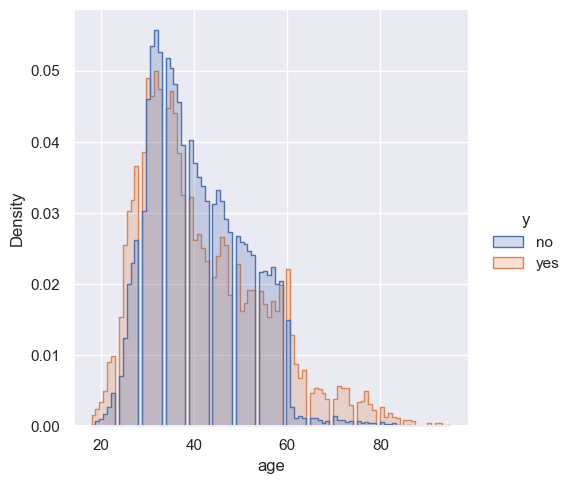

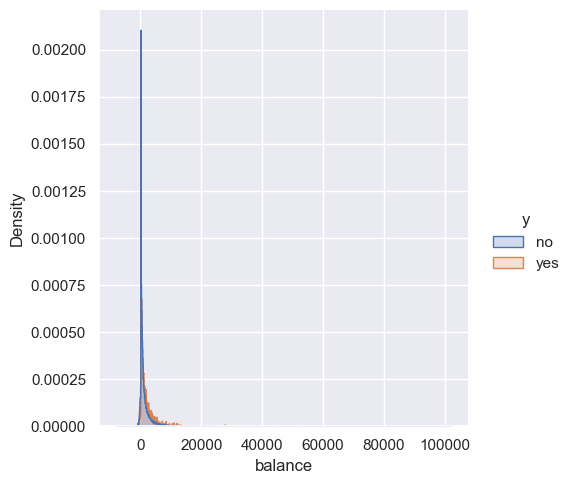

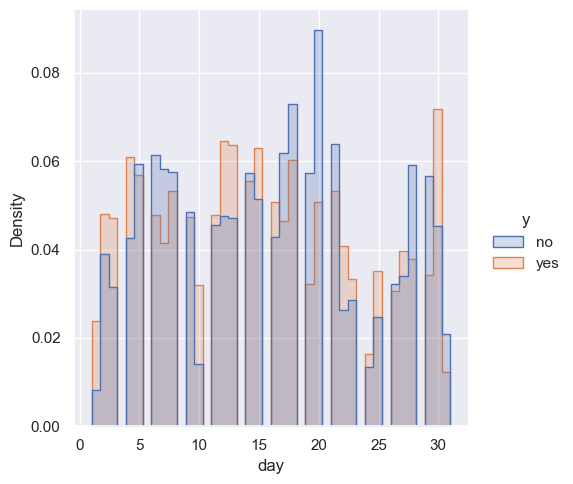

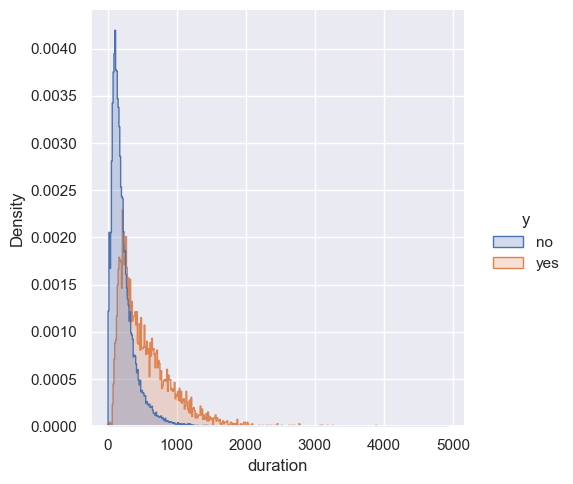

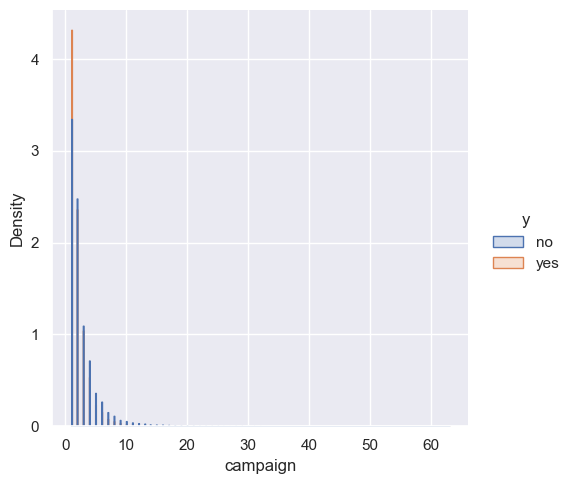

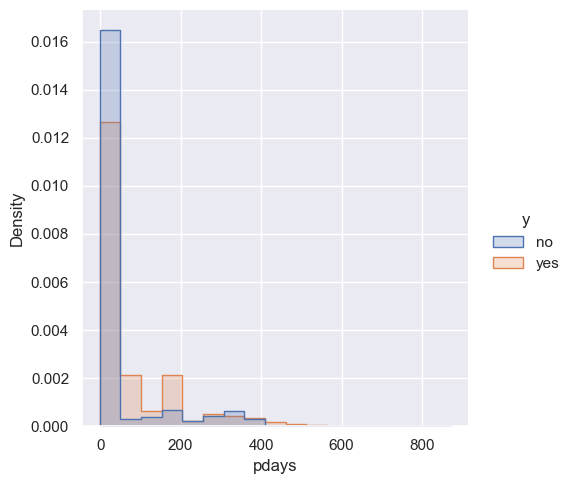

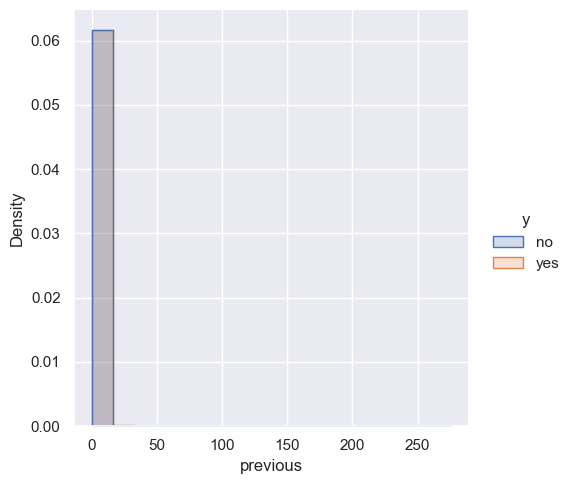

In [30]:
num_dist_targ(data, 'y')

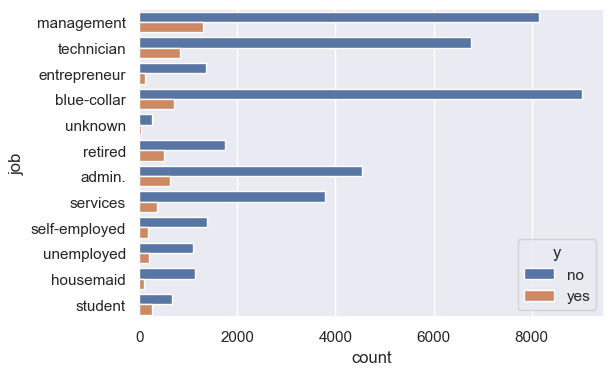

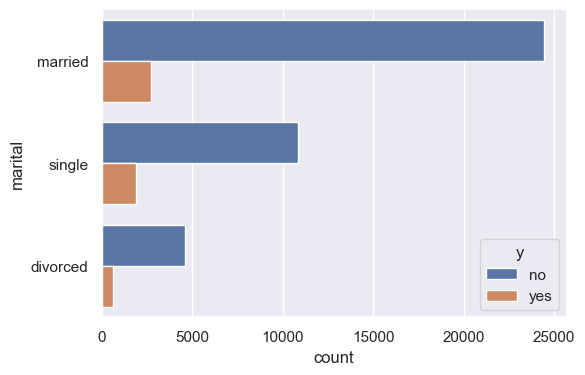

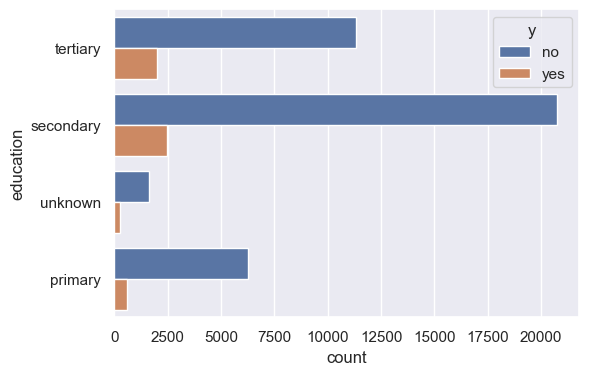

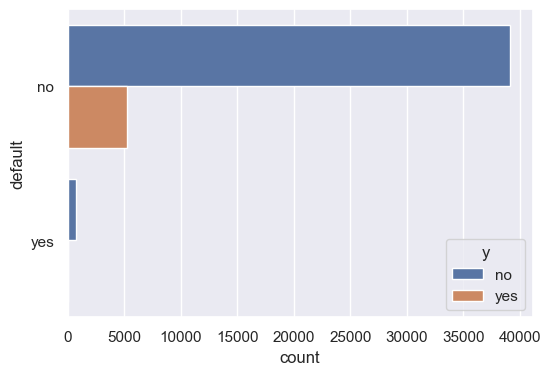

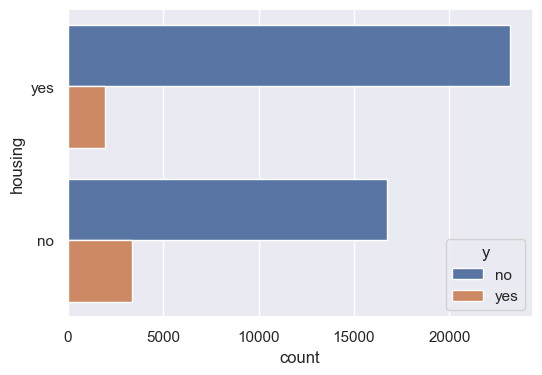

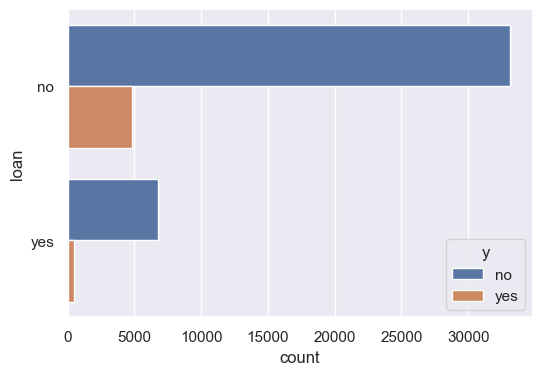

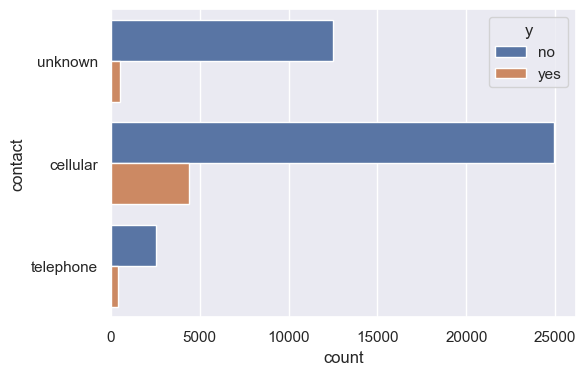

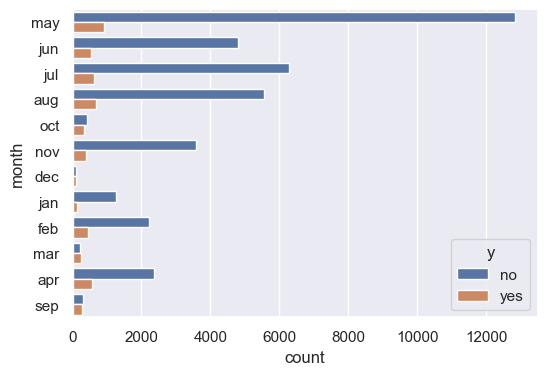

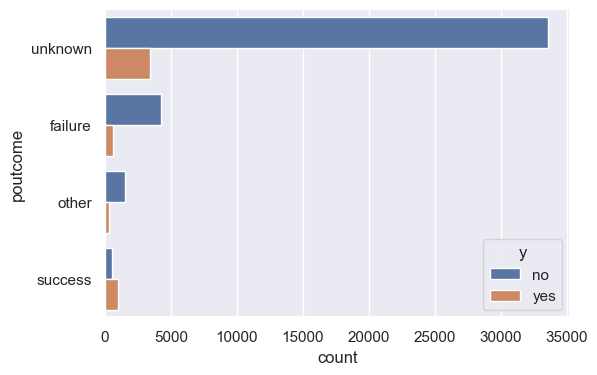

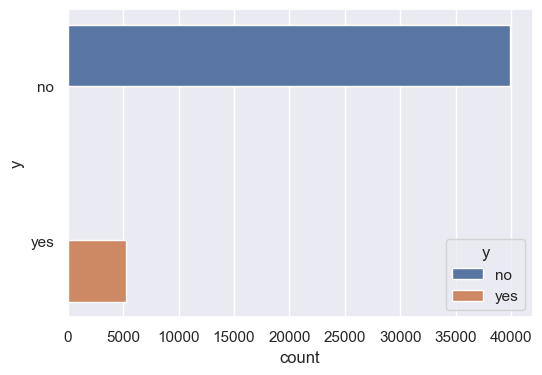

In [31]:
bi_cat_counts(data, 'y')

<a id="clean"></a>

## 2.3 Data Quality


### Missing Data

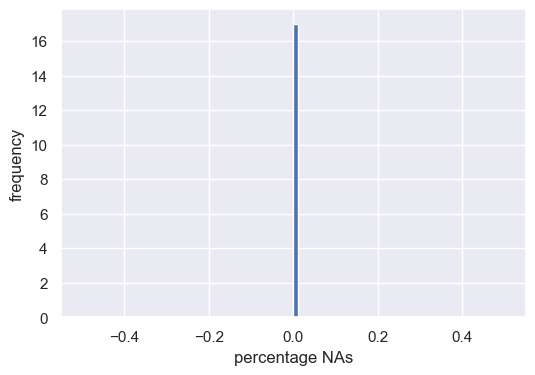

,Total,Percent
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
contact,0,0.0
job,0,0.0


In [32]:
# Missing data 
missing_data = find_missing_data(data)
missing_data.head(10)

***


# **<font color=blue> 3. Data Preparation</font>** 
>## 3.1 [Select Data](#select)
>## 3.2 [Clean Data](#clean)
>> ### 3.2.1   [Missing Values](#missing)
>> ### 3.2.2   [Outliers](#outliers)
>## 3.3 [Feature Engineering](#Construct)
>> ### 3.3.1   [Transforming Categorical Data](#dummy)
>> ### 3.3.2   [Addressing Skewness of Freatures](#skew)
>> ### 3.3.3   [Normalizing Numerical Variables](#numerical)
>> ### 3.3.4   [Variable Selection](#var_select)
>## 3.4 [Data Integration](#integrate)
>> ### 3.4.1   [Merging Numerical and Categorical Data](#num_and_cat)
>## 3.5 [Format Data](#format)

##### *


<a id="select"></a>


## 3.1 Select Data
##### **Goal / Tasks:** 
- Which datasets will be used and document reasons for inclusion/exclusion. 
- Set criteria based on relevance of the available data to your goals, technical constraints, and quality of information 

In [33]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [34]:
import random
majority_class = data.loc[data['y']=='no',:]
minority_class = data.loc[data['y']=='yes',:]

random_index = random.sample(majority_class.index.tolist(), data['y'].value_counts()[1])
majority_class = majority_class.loc[random_index,:]
balanced_df = pd.concat([majority_class,minority_class],axis=0)
print(balanced_df.shape)
balanced_df['y'].value_counts()

(10578, 17)


yes    5289
no     5289
Name: y, dtype: int64

<br>
<a id="clean"></a>


## 3.2 Clean Data
**Goal / Tasks:** 
- Process involves raising the quality of records (choose clean subsets, insert necssary defaults, or more advanced techniques
- Describe actions and decisions taken to address issues related to data quality that were found in the Verify Data Quality task. 
- Necessary to consider the transformations of the data, and the impact that it might have on the analysis results


In [35]:
def remove_outliers(data):
    for i in data.select_dtypes(include=np.number):
        Q1 , Q3 = data[i].quantile(0.25) , data[i].quantile(0.75)
        IQR = Q3 - Q1 #Interquartile range
        FQR, TQR = Q1 - 1.5 * IQR , Q3 + 1.5 *IQR
        data = data[(data[i] >= FQR) & (data[i] <= TQR)]
        return data
    

def remove_correlated(data, threshold):
    cm = data.corr()
    corrs = cm.stack().reset_index()
    corrs.columns = ['V1', 'V2', 'Corr']
    corrs['Abs Corr'] = abs(corrs['Corr'])
    corrs = corrs[corrs['Corr'] != 1]
    
    v1 = list(set(correlations[correlations['Abs Corr'] > 0.7]['V1']))
    v2 = list(set(correlations[correlations['Abs Corr'] > 0.7]['V2']))
    correlated_vars = list(set(v1 + v2))

    data = data.drop(correlated_vars, axis=1)
    
    return data

<a id="missing"></a>

### 3.2.1 Missing Values

In [36]:
#no missing values

<a id="missing"></a>
### 3.2.2 Outliers


In [37]:
# missing values and outliers
# No missing values
data = remove_outliers(data)
data.shape

(44724, 17)

<a id="correlated"></a>
### 3.2.3 Correlated


<br>
<a id="Construct"></a>

## 3.3 Feature Engineering - Construct, Transform, and Derive Data

**Goal / Tasks:** 
- Process involes operations such as production of derived attributes or entire new records, or transformed values for existing attributes

In [38]:
def split_cats(cat_data):
    """ Splits categorical features into binary and multi"""
    cat_counts = cat_data.describe().loc['unique']
    multi_cats = cat_counts[cat_counts > 2]
    bi_cats = cat_counts[cat_counts <= 2]
    multi_cats_list = list(multi_cats.index)
    bi_cats_list = list(bi_cats.index)

    return bi_cats_list, multi_cats_list

def get_binary(cat_data, bi_cats):
    """ Converts all discrete categorical variables to binary"""
    ordinal_status = {'yes': 1, 'no': 0}
    binary_data = cat_data.loc[:,bi_cats]
    for i in bi_cats:
        binary_data[i].replace(ordinal_status, inplace = True)
    return binary_data


<a id="dummy"></a>

### 3.3.1 Transforming Categorical Data 
It is not mandatory to scale one-hot encoded or dummy variables but should consider if variability is ver high


In [39]:
cat_data = balanced_df.select_dtypes(include='O')

# get multi and binary categorical variables
bi_cats, multi_cats = split_cats(cat_data)

#get dummy variables for nomial and ordinal categories 
nom_data = pd.get_dummies(cat_data.loc[:,multi_cats])
ordinal_data = get_binary(cat_data, bi_cats)


<a id="skew"></a>

### 3.3.2 Addressing Skewness of Numerical Features 


<a id="numerical"></a>

### 3.3.3 Normalizing / Standardization of Numerical Variables
standardization (Z-score normalization) is rescaling the features to have the properties of a standrad normal distribution with u = 0 and and sd = 1
Must scale for kmeans, logistic regressions, SVMs, perceptrons, neural netorwks, etc (anything that relies on a distance loss function)

In [40]:
# num_data_raw = data.select_dtypes(include=np.number)

# sc = MinMaxScaler(feature_range=(0,1))
# scaled_num_data = sc.fit_transform(num_data_raw)
# scaled_num_data = pd.DataFrame(scaled_num_data, index=num_data_raw.index, columns=num_data_raw.columns)

# print(scaled_num_data.shape)
# #scaled_num_data

<a id="var_select"></a>

### 3.3.4 Variable Selection


In [41]:
##### Remove variables that are highly correlated with eachother
# pdays and previous were highly correlated - remove previous
balanced_df = balanced_df.drop('previous', axis = 1)

In [42]:
##### Remove variables that are irrelevant
# previous was irrelvant (based on graph in 2.25)

<br>
<a id="integrate"></a>

## 3.4 Integrate Data


<a id="num_and_cat"></a>
### 3.4.1 Integrate Numerical and Categorical Data

In [43]:
# join the ordinal features with the dummy features to form categorical data
num_data = balanced_df.select_dtypes(include=np.number)
cat_data = pd.concat([ordinal_data, nom_data], axis = 1)

df = pd.concat([cat_data, num_data], axis = 1)
print(df.shape)
#print(list(df.columns))
df.head()

(10578, 48)


,default,housing,loan,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays
33000,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,35,1045,17,204,5,-1
16296,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,46,2427,23,40,1,-1
3858,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,41,124,16,393,2,-1
8767,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,57,137,4,91,4,-1
19602,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,35,753,7,187,4,-1


### 3.4.2 Downsampling
    Need to adjust for imbalanced distribution of target variable

In [44]:
# import random
# majority_class = df.loc[df['y']==0,:]
# minority_class = df.loc[df['y']==1,:]

# random_index = random.sample(majority_class.index.tolist(), df['y'].value_counts()[1])
# majority_class = majority_class.loc[random_index,:]
# balanced_df = pd.concat([majority_class,minority_class],axis=0)
# print(balanced_df.shape)
# balanced_df['y'].value_counts()


<a id="format"></a>

## 3.5 Format Data
**Goal / Tasks:** 
- formatting transformations are primarily syntatic modifications that don't change its meaning but might be required by the model (standardization, ordering)

<a id="numerical"></a>

### 3.3.3 Normalizing / Standardization of Numerical Variables
standardization (Z-score normalization) is rescaling the features to have the properties of a standrad normal distribution with u = 0 and and sd = 1
Must scale for kmeans, logistic regressions, SVMs, perceptrons, neural netorwks, etc (anything that relies on a distance loss function)

In [46]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_balanced_df = sc.fit_transform(df)
scaled_balanced_df = pd.DataFrame(scaled_balanced_df, index=df.index, columns=df.columns)

# print(scaled_num_data.shape)
# #scaled_num_data
scaled_balanced_df

,default,housing,loan,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays
33000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.220779,0.048693,0.533333,0.052075,0.088889,0.000000
16296,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.363636,0.065095,0.733333,0.009796,0.000000,0.000000
3858,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.298701,0.037763,0.500000,0.100799,0.022222,0.000000
8767,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.506494,0.037917,0.100000,0.022944,0.066667,0.000000
19602,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.220779,0.045228,0.200000,0.047693,0.066667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.714286,0.070115,0.533333,0.076824,0.000000,0.047953
45205,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.090909,0.042285,0.533333,0.098995,0.022222,0.000000
45206,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.428571,0.046082,0.533333,0.251353,0.044444,0.000000
45207,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.688312,0.056811,0.533333,0.117040,0.022222,0.000000


*** 

*** 
<a id="Model"></a>

# **<font color=blue> 4. Modeling</font>** 

>#### 4.1 [Logistic Regression](#logreg)
>> ##### 4.1.1   [Simple](#logregsimple)
>> ##### 4.1.2   [Regularized (Ridge)](#logridge)
>> ##### 4.1.3   [Regularized (Lasso)](#loglasso)
>> ##### 4.1.4   [Regularized (Elastic Net)](#lognet)
>#### 4.2 [Decision Tree](#dtree)
>> ##### 4.1.1   [Simple Decision Tree](#simpletree)
>#### 4.3 [Model Comparison](#compare)
>#### 4.4 [Final Model](#final)
>> ##### 4.4.1   [Feature Importance](#features)
>> ##### 4.4.2   [Expected Value](#expected)
>> ##### 4.4.3   [Cumulative Gains & Lift](#lift)


Testing Design

In [47]:
df = df.copy()
X = df.drop('y', axis = 1)
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

test_df = x_test.copy()
train_df = x_train.copy()

print(X.shape)
X.head()

(10578, 47)


,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays
33000,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,35,1045,17,204,5,-1
16296,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,46,2427,23,40,1,-1
3858,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,41,124,16,393,2,-1
8767,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,57,137,4,91,4,-1
19602,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,35,753,7,187,4,-1


<a id="logreg"></a>

## 4.1 Logistic Regression


In [48]:
def get_model_metrics(x_train, y_train, x_test, y_test, preds, mdl):
    
    train_acc = mdl.score(x_train,y_train)
    test_acc = mdl.score(x_test, y_test)
    rmse = (np.sqrt(mean_squared_error(y_test, preds)))
    
    results = {'Train_acc': train_acc, 'Test_acc': test_acc, 'rmse': rmse}
    #model = f'{mdl=}'.split('=')[1:]
    model = 'Value'
    model_metrics = pd.DataFrame(results.items(), columns = ['Metric', str(model)]).set_index('Metric')
    #model_metrics['Model'] = str(model)
    return model_metrics

def classification_metrics(x_train, y_train, x_test, y_test, preds ,probs ,mdl):
    #Logistic Evaluation Metrics
    Accuracy = accuracy_score(y_test, preds)
    Precision  = precision_score(y_test, preds)
    Recall = recall_score(y_test, preds)

    #Confusion Matrix
    cm = pd.DataFrame(confusion_matrix(y_test, preds, labels=[0,1]))
    TN = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                        # True Negatives
    TP = cm[1][1]
    TPR = TN/(FP+TN)   
    FPR = FP/(FP+TN)

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr )

    #Summary df
    logit_summary = {'Accuracy': Accuracy, 
                     'Precision': Precision, 
                     'Recall': Recall, 
                     'True Positive Rate': TPR, 
                     'False Positive Rate': FPR,
                    }
    
    #model  = f'{mdl=}'.split('=')[1:]
    model = 'Value'
    class_metrics = pd.DataFrame(logit_summary.items(), columns = ['Metric', str(model)]).set_index('Metric')
    #class_metrics['Model'] = str(model)
    # ROC Curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")

    #Confusion Matrix
    fig, ax = plt.subplots(figsize=(4, 4))
    sklearn.metrics.plot_confusion_matrix(mdl, x_test, y_test, cmap=plt.cm.Blues, ax=ax)
    plt.tight_layout()
    plt.title('Confusion Matrix', y = 1.1)
    #new_style = {'grid':False}
    #plt.show();
    
    return class_metrics

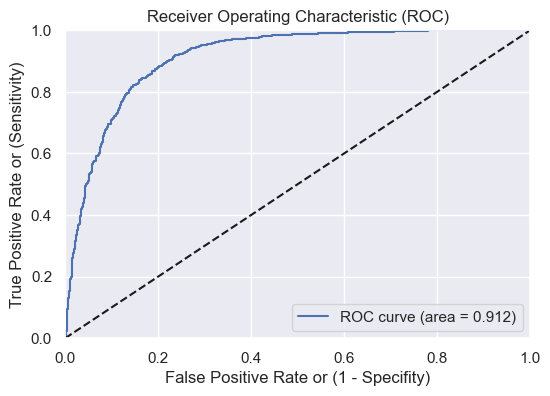

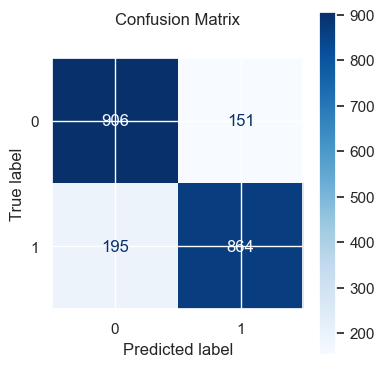

,Metric,Value,Model
0,Train_acc,0.834200,Logisitc
1,Test_acc,0.836484,Logisitc
2,rmse,0.404371,Logisitc
3,Accuracy,0.836484,Logisitc
4,Precision,0.851232,Logisitc
5,Recall,0.815864,Logisitc
6,True Positive Rate,0.857143,Logisitc
7,False Positive Rate,0.142857,Logisitc


In [49]:
logit = LogisticRegression(solver='liblinear', random_state=0)
logit.fit(x_train, y_train)
logit_preds = logit.predict(x_test)
logit_probs = logit.predict_proba(x_test)[:,1]
logit_probs2 = logit.predict_proba(x_test)

# regression evaluation
model_metrics = get_model_metrics(x_train, y_train, x_test, y_test, logit_preds, logit)

#classifcation metrics
class_metrics = classification_metrics(x_train, y_train, x_test, y_test, logit_preds,logit_probs, logit)
y_true = y_test.values

# fig, ax = plt.subplots(1,2, figsize= (10,5), sharex=False)
# plot_cumulative_gain(y_true, logit_probs, ax = ax[0])
# plot_lift_curve(y_true, logit_probs, ax = ax[1])


metrics_list = [model_metrics, class_metrics]
lgrmetrics = pd.concat(metrics_list)
lgrmetrics = lgrmetrics.reset_index()
lgrmetrics['Model'] = 'Logisitc'

plt.show();
lgrmetrics

<a id="dtree"></a>

## 4.2 Decision Tree


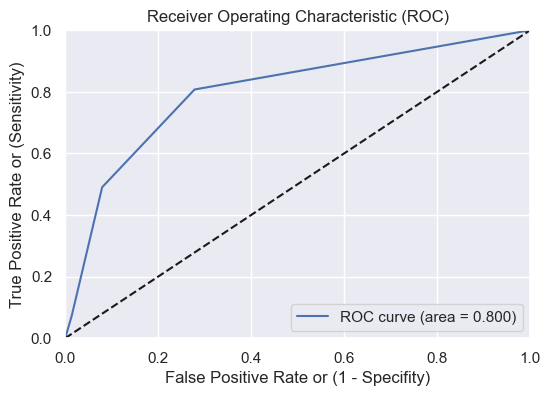

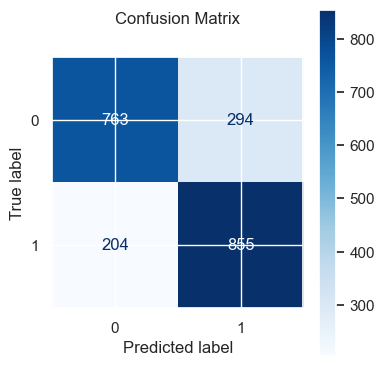

,Metric,Value,Model
0,Train_acc,0.758331,Tree
1,Test_acc,0.764650,Tree
2,rmse,0.485129,Tree
3,Accuracy,0.764650,Tree
4,Precision,0.744125,Tree
5,Recall,0.807365,Tree
6,True Positive Rate,0.721854,Tree
7,False Positive Rate,0.278146,Tree


In [50]:
clf = tree.DecisionTreeClassifier(max_depth=2, random_state =42)
clf  = clf.fit(x_train, y_train)

#predict
tree_preds = clf.predict(x_test)
tree_probs = clf.predict_proba(x_test)[:,1]

# regression evaluation
model_metrics = get_model_metrics(x_train, y_train, x_test, y_test, tree_preds, clf)

#classifcation metrics
class_metrics = classification_metrics(x_train, y_train, x_test, y_test, tree_preds, tree_probs, clf)

metrics_list = [model_metrics, class_metrics]
tree_metrics = pd.concat(metrics_list)
tree_metrics['Model'] = 'Tree'
tree_metrics = tree_metrics.reset_index()
plt.show();
tree_metrics

<a id="forest"></a>

## 4.3 RandomForest

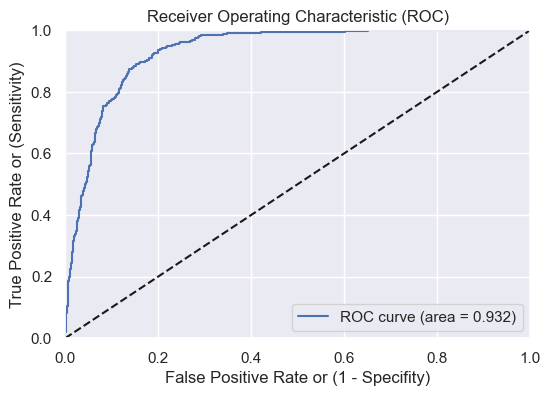

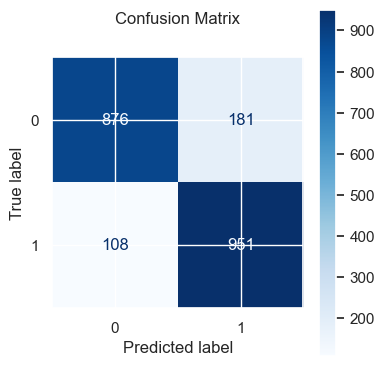

,Metric,Value,Model
0,Train_acc,0.971283,Forest
1,Test_acc,0.863422,Forest
2,rmse,0.369565,Forest
3,Accuracy,0.863422,Forest
4,Precision,0.840106,Forest
5,Recall,0.898017,Forest
6,True Positive Rate,0.828761,Forest
7,False Positive Rate,0.171239,Forest


In [51]:
# Initialize optimized Random Forest model
rfc = RandomForestClassifier(n_estimators=500, max_depth=16)
rfc = rfc.fit(x_train, y_train)
# Model prediction
forest_preds = rfc.predict(x_test)
forest_probs = rfc.predict_proba(x_test)[:,1]

# regression evaluation
model_metrics = get_model_metrics(x_train, y_train, x_test, y_test, forest_preds, rfc)

#classifcation metrics
class_metrics = classification_metrics(x_train, y_train, x_test, y_test, forest_preds, forest_probs, rfc)

metrics_list = [model_metrics, class_metrics]
forest_metrics = pd.concat(metrics_list)
forest_metrics['Model'] = 'Forest'
plt.show();
forest_metrics = forest_metrics.reset_index()
forest_metrics

<a id="compare"></a>

## 4.4 Model Comparison

In [52]:
def compare_models(models, lgrmetrics,tree_metrics, forest_metrics ):
    models_metrics = pd.concat(models)
    melted = pd.melt(models_metrics, id_vars = ['Metric', 'Model'])
    melted = melted.sort_values(by = 'Metric').drop('variable', axis=1)
    
    sns.barplot(y=melted['Metric'], x=melted['value'], hue = melted['Model'])
    
    tree_sum = tree_metrics.rename(columns = {'Value': 'Decision Tree'}).drop('Model', axis=1)#.set_index('Metric')
    lgr_sum = lgrmetrics.rename(columns = {'Value': 'Logistic'}).drop('Model', axis=1)#.set_index('Metric')
    rfr_sum = forest_metrics.rename(columns = {'Value': 'Random Forest'}).drop('Model', axis=1)#.set_index('Metric')
    model_sum = pd.merge(lgr_sum, tree_sum)#.set_index('Metric')
    model_sum = model_sum.set_index('Metric').join(rfr_sum.set_index('Metric'))

    
    return model_sum

    

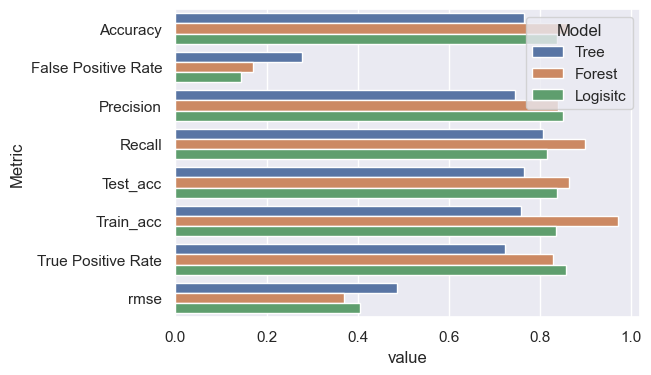

,Logistic,Decision Tree,Random Forest
Metric,,,
Train_acc,0.834200,0.758331,0.971283
Test_acc,0.836484,0.764650,0.863422
rmse,0.404371,0.485129,0.369565
Accuracy,0.836484,0.764650,0.863422
Precision,0.851232,0.744125,0.840106
Recall,0.815864,0.807365,0.898017
True Positive Rate,0.857143,0.721854,0.828761
False Positive Rate,0.142857,0.278146,0.171239


In [53]:
models = [lgrmetrics, tree_metrics, forest_metrics]
models_summary = compare_models(models, lgrmetrics, tree_metrics, forest_metrics)

#model_rankings = models_summary.T.rank(ascending=False).T
plt.show();
models_summary

<a id="compare"></a>

## 4.4 Model Assessment

In [54]:
# add predictions to set

def add_predictions_full(x_train, x_test, y_train, y_test, mdl):
    
    train_preds, test_preds = mdl.predict(x_train), mdl.predict(x_test)
    train_probs, test_probs = mdl.predict_proba(x_train)[:,1] , mdl.predict_proba(x_test)[:,1]
    
    x_train['Score'] , x_train['Predicted'] = train_probs , train_preds
    x_test['Score'], x_test['Predicted'] = test_probs, test_preds
    
    train_data = x_train.join(y_train)#, on = 'Customer')
    test_data = x_test.join(y_test)#, on = 'Customer')
    datasets = [train_data, test_data]
    df = pd.concat(datasets)
    return df

def calc_cum_gains(df, actual_col, predicted_col, probability_col):
    
    df.sort_values(by=probability_col, ascending=False, inplace=True)
    subset = df[df[predicted_col] == True]
    rows = []
    for group in np.array_split(subset, 10):
        score = sklearn.metrics.accuracy_score(group[actual_col].tolist(),
                                                       group[predicted_col].tolist(),
                                                       normalize=False)
        rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

    lift = pd.DataFrame(rows)

    #Cumulative Gains Calculation
    lift['RunningCorrect'] = lift['NumCorrectPredictions'].cumsum()
    lift['PercentCorrect'] = lift.apply(
            lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x['RunningCorrect'], axis=1)
    lift['CumulativeCorrectBestCase'] = lift['NumCases'].cumsum()
    
    lift['PercentCorrectBestCase'] = lift['CumulativeCorrectBestCase'].apply(
            lambda x: 100 if (100 / lift['NumCorrectPredictions'].sum()) * x > 100 else (100 / lift[
                'NumCorrectPredictions'].sum()) * x)
    
    lift['AvgCase'] = lift['NumCorrectPredictions'].sum() / len(lift)
    lift['CumulativeAvgCase'] = lift['AvgCase'].cumsum()
    lift['PercentAvgCase'] = lift['CumulativeAvgCase'].apply(
            lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x)

        #Lift Chart
    lift['NormalisedPercentAvg'] = 1
    lift['NormalisedPercentWithModel'] = lift['PercentCorrect'] / lift['PercentAvgCase']

    return lift

def plot_lift_cumgains(lift):
    
    lift['lift'] = lift['PercentCorrect'] / lift['PercentAvgCase']
    cun_gains = lift[['PercentCorrect', 'PercentCorrectBestCase', 'PercentAvgCase']].reset_index().rename(columns = {'index':'Decile', 'PercentCorrect':
                                                                                                                    'Model', 'PercentCorrectBestCase':
                                                                                                                    'Perfect Model ', 'PercentAvgCase':'Random Model'})
    fig, axes = plt.subplots(1, 2, figsize=(14, 6) ,sharex=True)
    sns.lineplot(ax = axes[0], x= 'Decile', y ='value', hue='variable', data = pd.melt(cun_gains, 'Decile'))
    axes[0].set_title('Cumulative Gains')
    axes[0].set_ylabel("% Positive Responses")
    axes[0].set_ylabel("% of Sample")


    lift_curve = lift[['lift', 'NormalisedPercentAvg']].reset_index().rename(columns = {'index':'Decile', 'NormalisedPercentAvg': 'Baseline'})
    sns.lineplot(ax = axes[1],x= 'Decile' ,y ='value',hue ='variable', data = pd.melt(lift_curve, 'Decile'))
    axes[1].set(xlim=(0,10))
    axes[1].set_title('Lift Curve')
    axes[1].set_ylabel("Lift Value")
    axes[1].set_ylabel("% of Sample")

def eval_log_coef(logit, x_train):

    logit_coefs = pd.DataFrame(logit.coef_, columns=x_train.columns, index=['coef']).T
    odds_change = []
    prob_change = []
    variance = []
    var_importance = []

    for k, v in logit_coefs.iterrows():

        #changes in the odds ratio is the exp of the coefficient
        odds_impact = np.exp(v['coef'])

        probs_impact = odds_impact / (1  + odds_impact)

        #variable importance multiples coef by standard deviation
        sd = np.std(x_train[k])
        var_imp = abs(np.exp(v['coef']*sd) - 1)

        var_importance.append(var_imp)
        variance.append(sd)
        odds_change.append(odds_impact)
        prob_change.append(probs_impact)

    logit_coefs['SD'] = variance
    logit_coefs['Change in Odds (%)'] = odds_change
    logit_coefs['Change in Probability'] = prob_change
    logit_coefs['Variable Importance'] = var_importance
    logit_coefs = logit_coefs.reset_index().rename(columns = {'index': 'Variable'})
    logit_coefs = logit_coefs.sort_values('Variable Importance', ascending=False)

    # Plotting variable importance
    logit_coefs = logit_coefs.sort_values('Variable Importance', ascending=False)
    top_coefs = logit_coefs.head(10)
    bottom_coefs = logit_coefs.tail(5)
    fig, axes = plt.subplots(2, 1, figsize=(5, 10) ,sharex=False)
    fig.suptitle('Variable Importance')
    sns.barplot(ax = axes[0],
                x = top_coefs['Variable Importance'], 
                y = top_coefs['Variable'])
    
     # Plotting variable importance
    logit_coefs = logit_coefs.sort_values('Change in Odds (%)', ascending=False)
    top_coefs2 = logit_coefs.head(10)
    #fig.suptitle('Change in Odds for Unit Increase in X')
    sns.barplot(ax = axes[1],
                x = top_coefs2['Change in Odds (%)'], 
                y = top_coefs2['Variable'])

    plt.show();
    return logit_coefs
    #plt.show();

#### Adjusting for Oversampling

In [ ]:
def class

### 4.4.1 Cumulative Gains and Lift

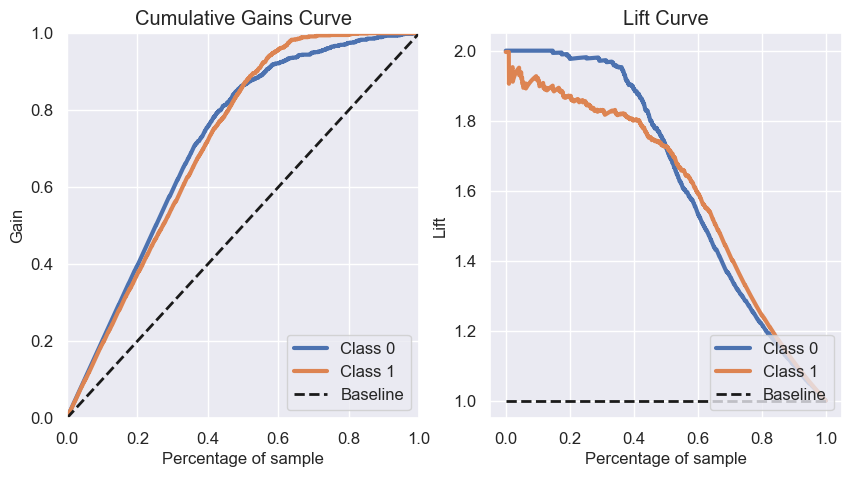

In [55]:
x_train2, x_test2, y_train2, y_test2 = x_train.copy(), x_test.copy(), y_train.copy(), y_test.copy()

final_df  = add_predictions_full(x_train2, x_test2, y_train2, y_test2, logit)
y_probas = rfc.predict_proba(x_test)
y_probas1 = rfc.predict_proba(x_test)[:,1]

y_true = y_test.values
fig, ax = plt.subplots(1,2, figsize= (10,5), sharex=False)
plot_cumulative_gain(y_true, y_probas, ax = ax[0])
plot_lift_curve(y_true, y_probas, ax = ax[1])
plt.show();

### 4.4.2 Feature Importance

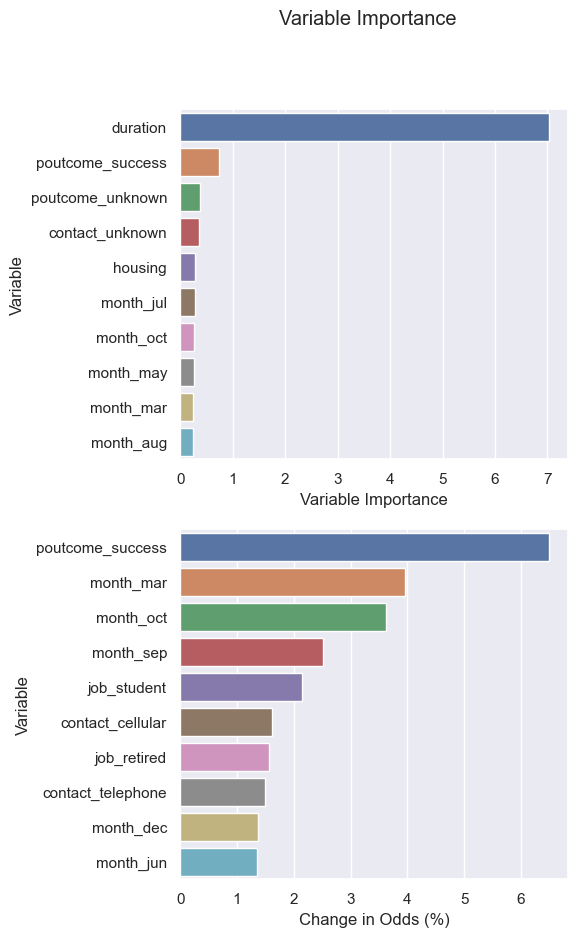

,Variable,coef,SD,Change in Odds (%),Change in Probability,Variable Importance
39,poutcome_success,1.871512,0.296951,6.498111,0.866633,0.743242
32,month_mar,1.373804,0.160532,3.950349,0.797994,0.246749
35,month_oct,1.288074,0.185217,3.625796,0.783821,0.269437
36,month_sep,0.918416,0.163977,2.505318,0.714719,0.162530
11,job_student,0.759564,0.179792,2.137344,0.681259,0.146328


In [56]:
logit_coefs = eval_log_coef(logit, x_train)
logit_coefs.head()

*** 
<a id="eval"></a>

# **5. Evaluation** 


**Need to adjust probabilites for oversampling**

In [57]:
final_df.columns

Index(['default', 'housing', 'loan', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'age', 'balance', 'day', 'duration', 'campaign',
       'pdays', 'Score', 'Predicted', 'y'],
      dtype='object')

In [58]:
final_df

,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,poutcome_unknown,age,balance,day,duration,campaign,pdays,Score,Predicted,y
2896,0,1,0,0,0,0,0,1,0,0,...,1,47,3158,14,282,1,-1,0.089932,0,0
1675,0,1,0,0,1,0,0,0,0,0,...,1,28,6,9,254,1,-1,0.050969,0,0
33542,0,1,0,0,0,0,0,0,0,0,...,1,28,2925,20,81,4,-1,0.207272,0,0
17470,0,0,1,1,0,0,0,0,0,0,...,1,30,2351,28,91,13,-1,0.064002,0,0
33196,0,1,0,0,0,0,0,0,0,0,...,1,38,797,20,62,4,-1,0.109363,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34778,0,1,0,0,0,0,0,0,0,1,...,1,32,0,6,767,1,-1,0.901454,1,1
31072,0,0,0,0,0,0,0,0,1,0,...,1,67,1341,13,706,1,-1,0.971539,1,1
16093,0,1,0,0,1,0,0,0,0,0,...,1,27,237,22,283,6,-1,0.090463,0,0
40222,0,0,0,0,0,0,0,0,0,0,...,1,25,3630,9,221,7,-1,0.583940,1,1


In [59]:
final_df.to_csv('final.csv')

In [60]:
balanced_df
preds = final_df[['Score', 'Predicted']]
preds

,Score,Predicted
2896,0.089932,0
1675,0.050969,0
33542,0.207272,0
17470,0.064002,0
33196,0.109363,0
...,...,...
34778,0.901454,1
31072,0.971539,1
16093,0.090463,0
40222,0.583940,1


In [61]:
churn_df = balanced_df.join(preds)
churn_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,y,Score,Predicted
33000,35,management,single,tertiary,no,1045,yes,no,cellular,17,apr,204,5,-1,unknown,no,0.357869,0
16296,46,blue-collar,married,primary,no,2427,no,no,cellular,23,jul,40,1,-1,unknown,no,0.072721,0
3858,41,services,married,primary,no,124,yes,no,unknown,16,may,393,2,-1,unknown,no,0.063441,0
8767,57,management,single,secondary,no,137,yes,no,unknown,4,jun,91,4,-1,unknown,no,0.055862,0
19602,35,entrepreneur,married,tertiary,no,753,no,no,cellular,7,aug,187,4,-1,unknown,no,0.212268,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,failure,yes,0.623464,1
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,unknown,yes,0.466349,0
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,unknown,yes,0.979038,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,unknown,yes,0.676027,1


In [63]:
churn_df.to_csv('churn_df.csv')